# Exploratory Data Analysis | Transactions (Train)

`transactions_train.csv` - the training data, consisting of the purchases each customer for each date, as well as additional information. Duplicate rows correspond to multiple purchases of the same item. Your task is to predict the article_ids each customer will purchase during the 7-day period immediately after the training data period.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Info

In [2]:
df = pd.read_csv('../data/00_raw/transactions_train.csv')

In [3]:
df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [4]:
df.shape

(31788324, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [6]:
df.describe()

,article_id,price,sales_channel_id
count,3.178832e+07,3.178832e+07,3.178832e+07
mean,6.962272e+08,2.782927e-02,1.704028e+00
std,1.334480e+08,1.918113e-02,4.564786e-01
min,1.087750e+08,1.694915e-05,1.000000e+00
25%,6.328030e+08,1.581356e-02,1.000000e+00
50%,7.145820e+08,2.540678e-02,2.000000e+00
75%,7.865240e+08,3.388136e-02,2.000000e+00
max,9.562170e+08,5.915254e-01,2.000000e+00


## Exploratory Data Analysis

### Transaction Dates

In [7]:
df['t_dat'] = pd.to_datetime(df['t_dat'])

In [8]:
df['month_year'] = df['t_dat'].dt.to_period('M')

In [9]:
df_ts = df.groupby(['month_year'])['t_dat'].count().reset_index(name='num_transactions')

In [10]:
# date range for data
df['t_dat'].min(), df['t_dat'].max()

(Timestamp('2018-09-20 00:00:00'), Timestamp('2020-09-22 00:00:00'))

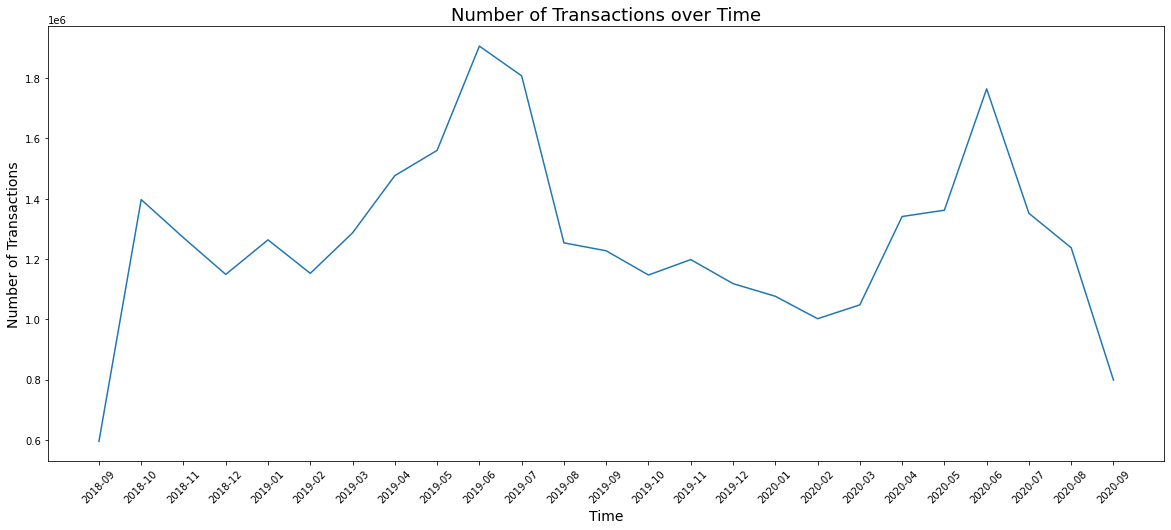

In [11]:
plt.figure(figsize=(20,8))
plt.plot(df_ts.month_year.astype('str'), df_ts.num_transactions)
plt.xticks(rotation = 45)
plt.title('Number of Transactions over Time', fontsize=18)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)
plt.show()

Potentially seasonal components to data (summer months have an increase in transactions).

### Customer IDs

In [12]:
num_customers = len(list(df['customer_id'].unique()))
num_customers

1362281

In [13]:
len(df)/num_customers

23.334630667241193

On average, each customer made roughly 23 unique transactions.

### Article IDs

In [14]:
num_articles = len(list(df['article_id'].unique()))
num_articles

104547

In the 2 year period, 104,547 unique articles of clothing were bought.

### Price

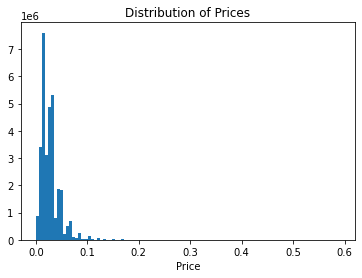

In [15]:
plt.hist(df['price'], bins=100)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.show()

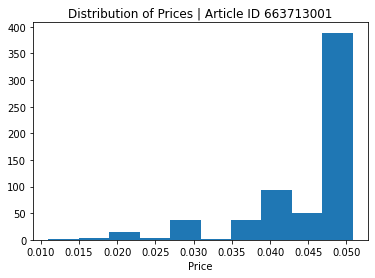

In [23]:
# one artcile of clothing will have different distribution of prices
article_663713001_dist = df[df['article_id']==663713001]

plt.hist(article_663713001_dist['price'], bins=10)
plt.title('Distribution of Prices | Article ID 663713001')
plt.xlabel('Price')
plt.show()

## Sales Channel

There are two sales channels, retail store (1) and online (2).

In [16]:
df['sales_channel_id'].value_counts()

2    22379862
1     9408462
Name: sales_channel_id, dtype: int64

In [17]:
df_sc = df['sales_channel_id'].value_counts().reset_index(name='num_transactions')
df_sc['index'] = df_sc['index'].astype('str')
df_sc['index'] = df_sc['index'].apply(lambda x: 'Retail' if x == '1' else 'Online')
df_sc = df_sc.sort_values(by='index',ascending=False)

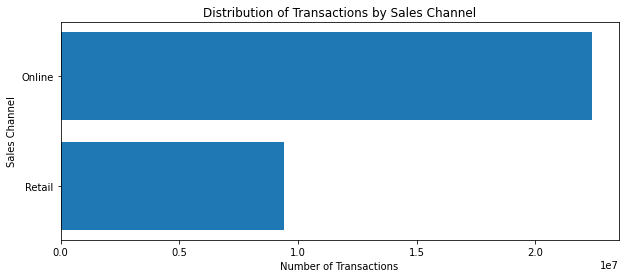

In [18]:
plt.figure(figsize=(10,4))
plt.barh(y=df_sc['index'], width=df_sc['num_transactions'])
plt.title('Distribution of Transactions by Sales Channel')
plt.ylabel('Sales Channel')
plt.xlabel('Number of Transactions')
plt.show()